# Problem Statement :

A machine learning model is to be proposed to predict a house price based on data related to the house i.e. its area_type, availability, location, size, society, total_sqft, bath and balcony	

### Goals of the Study:

The main objectives of this case study are as follows:

1. To apply data preprocessing and preparation techniques in order to obtain clean data (EDA)
2. To build machine learning models able to predict house price based on house features
3. To analyze and compare models performance in order to choose the best model

#  Importing Required Libraries for EDA

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [7]:

data = pd.read_csv("C:\\Users\\mahes\\OneDrive\\Desktop\\Mahesh_Works\\House_Price_Prediction_Model\\House_Data.csv",encoding="UTF-8")


In [8]:

# Top 10 records
data.head(10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Sarjapur Road,4 Bedroom,NaN,1,4.0,NaN,120.0
1,Built-up Area,Ready To Move,Srirampuram,7 BHK,NaN,5,7.0,3.0,115.0
2,Plot Area,18-Dec,Suragajakkanahalli,3 Bedroom,PrhyaK,11,3.0,2.0,74.0
3,Carpet Area,Ready To Move,Weavers Colony,1 BHK,NaN,15,1.0,0.0,30.0
4,Built-up Area,Ready To Move,Grihalakshmi Layout,5 Bedroom,NaN,24,2.0,2.0,150.0
5,Plot Area,Ready To Move,Mysore Road,1 Bedroom,NaN,45,1.0,0.0,23.0
6,Plot Area,19-Oct,Whitefield,4 Bedroom,NVaree,60,4.0,2.0,218.0
7,Super built-up Area,Ready To Move,Tilak Nagar,1 BHK,NaN,250,2.0,2.0,40.0
8,Plot Area,Ready To Move,Hennur Road,2 Bedroom,NaN,276,3.0,3.0,23.0
9,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.0


In [9]:

# Last 10 records
data.tail(10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13310,Super built-up Area,Ready To Move,Rajapura,2 BHK,NaN,86.72Sq. Meter,2.0,2.0,40.000
13311,Super built-up Area,19-Jul,Sarjapur Road,2 BHK,Sasta S,870 - 1080,2.0,0.0,28.275
13312,Super built-up Area,18-Aug,Magadi Road,2 BHK,Vrenty,884 - 1116,2.0,0.0,46.500
13313,Super built-up Area,18-Oct,Electronic City Phase II,2 BHK,SRhtsa,888 - 1290,2.0,0.0,32.670
13314,Super built-up Area,Ready To Move,Hoskote,2 BHK,Soose P,929 - 1078,2.0,0.0,28.095
13315,Super built-up Area,18-Nov,Thanisandra,2 BHK,Bhe 2ko,934 - 1437,2.0,0.0,58.680
13316,Super built-up Area,18-May,Mysore Road,2 BHK,Brama P,942 - 1117,2.0,0.0,50.855
13317,Super built-up Area,Ready To Move,Hormavu,2 BHK,SKvanin,943 - 1220,2.0,0.0,38.665
13318,Super built-up Area,18-Jun,Mysore Road,2 BHK,Gopia O,980 - 1030,2.0,0.0,35.175
13319,Super built-up Area,20-Dec,Whitefield,2 BHK,Somns T,981 - 1249,2.0,0.0,34.555


# Understanding and Pre-Processing of Data 

In [10]:

data.shape 


(13320, 9)

In [11]:

# There are 13320 rows and 9 columns.Let's have a look at all columns and their respective data types.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Null Value Check

In [13]:

# Gives % of null values for each column
round(data.isna().sum()*100/data.shape[0],2)


area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

### Dropping columns with excessive Null values

In [14]:

# Since society has 41% null values, we will drop it
data.drop(columns=['society'],inplace=True)


### Dropping rows with Null values

In [16]:

# Dropping rows that have null values for size
data.dropna(subset=['size'], how='all', inplace=True)

In [17]:

data.shape


(13304, 8)

### Filling of Null Values

In [18]:

# Location has 1 null value which we will replace with the mode of location values
data.location.fillna(data.location.mode()[0],inplace=True)


In [19]:

# Null bath values can be replaced with 1.Houses will have atleast one bathroom
data.bath.fillna(1,inplace=True)


In [20]:

# Null balcony values can be replaced with 0
data.balcony.fillna(0,inplace=True)


In [21]:

# All null values are dealt with
data.isna().sum()


area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Conversion of square feet values

In [22]:
# Notice that total sqft is of object data type, change that to float by using conversion() function. 
# This function converts all other area units to square feet as well.

def conversion(x) :
    try :
        if 'Perch' in x :
            x = x.replace('Perch','')
            return float(x)*272.3
        
        elif 'Sq. Meter' in x:
            x = x.replace('Sq. Meter','')
            return float(x)*10.764
        
        elif 'Sq. Yards' in x:
            x = x.replace('Sq. Yards','')
            return float(x)*9
        
        elif 'Acres' in x:
            x = x.replace('Acres','')
            return float(x)*43560
        
        elif 'Cents' in x :
            x = x.replace('Cents','')
            return float(x)*435.56
        
        elif 'Guntha' in x:
            x = x.replace('Guntha','')
            return float(x)*1089
        
        elif 'Grounds' in x :
            x = x.replace('Grounds','')
            return float(x)*2400.35
        
        else:
            return float(x)
           
    except:    
        # Exception occurs in cases where area range is given (for eg 2100-2800)
        list_ = x.split("-")
        arr = np.array(list_,dtype=float)
        return arr.mean()  # In this case mean is returned

data.total_sqft = data.total_sqft.apply(lambda x : conversion(x))


## Transforming Size column 

In [24]:

# Also size column can be converted to integer which shows 'bhk' value
data['bhk']=data['size'].str.split().str.get(0).astype(int)


In [25]:

# Now we don't know need size column so drop it
data.drop(columns=['size'],inplace=True)  


# Correlation Check

In [ ]:

data.corr()


In [ ]:

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.show()


In [27]:

# We see bath and bhk are highly correlated, so I will drop one of them
# Here I am dropping bhk column

data.drop(columns=['bhk'],inplace=True)


# Distinct Groups in Each Column

In [28]:

for i in data.columns:
    print(i,"->")
    print(data[i].value_counts())
    print()
    print("*"*40)
    print()
    

area_type ->
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

****************************************

availability ->
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
15-Jun               1
15-Dec               1
16-Nov               1
17-Jan               1
Name: count, Length: 80, dtype: int64

****************************************

location ->
location
Whitefield             540
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
Kamdhenu Nagar           1
Jagajyothi layout        1
1Channasandra            1
Chowdeshwari Layout      1
arudi                    1
Name: count, Length: 1304, dtype: int64

****************************************

total_sqft ->
total_sqft
120

## Transforming location Column

In [29]:

data.location.nunique()  # 1304 unique values 


1304


#location column is a categorical column , this needs to be converted to numerical column .
#When we convert to numerical column we will get too many columns using One hot encoder 
#All those locations which have really less count, mark it to Others in order to limit the features


In [30]:

location_count= data['location'].value_counts()

location_count_less_20= location_count[location_count<=20]
location_count_less_20


location
HBR Layout              20
Poorna Pragna Layout    20
Sanjay nagar            20
Yelachenahalli          20
HRBR Layout             19
                        ..
Kamdhenu Nagar           1
Jagajyothi layout        1
1Channasandra            1
Chowdeshwari Layout      1
arudi                    1
Name: count, Length: 1160, dtype: int64

In [31]:

# So if the area is having less than or equal to 20 houses I will mark them as "Others" 

data['location']=data['location'].apply(lambda x:'Others' if x in location_count_less_20 else x)


In [32]:

data.location.value_counts()  # 145 unique values left out of 1304


location
Others                4296
Whitefield             540
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
                      ... 
Domlur                  22
Ulsoor                  21
Hoskote                 21
Binny Pete              21
Basaveshwara Nagar      21
Name: count, Length: 145, dtype: int64

## Dropping Insignificant Columns

In [33]:

data.drop(columns=['availability','balcony'],inplace=True)


## Numerical Columns 

In [34]:

# Statistical information for numerical columns
data.describe()  


,total_sqft,bath,price
count,1.330400e+04,13304.000000,13304.000000
mean,1.911220e+03,2.685358,112.582035
std,1.728808e+04,1.343139,148.988398
min,1.000000e+00,1.000000,8.000000
25%,1.100000e+03,2.000000,50.000000
50%,1.276000e+03,2.000000,72.000000
75%,1.680000e+03,3.000000,120.000000
max,1.306800e+06,40.000000,3600.000000


# Categorical Columns

In [35]:

data.describe(include = 'object')


,area_type,location
count,13304,13304
unique,4,145
top,Super built-up Area,Others
freq,8790,4296


# UNIVARIATE ANALYSIS

In [ ]:

plt.figure(figsize=(15,6))
sns.countplot(data['area_type']) 
plt.show()


### Majority of the houses are in super built-up area and very few are in carpet area

In [ ]:

plt.figure(figsize=(15,6))
sns.countplot(data['bath']) 
plt.show()


### More than 50% houses have 2 baths and as the no. of baths keep on increasing the count of houses fall drastically.

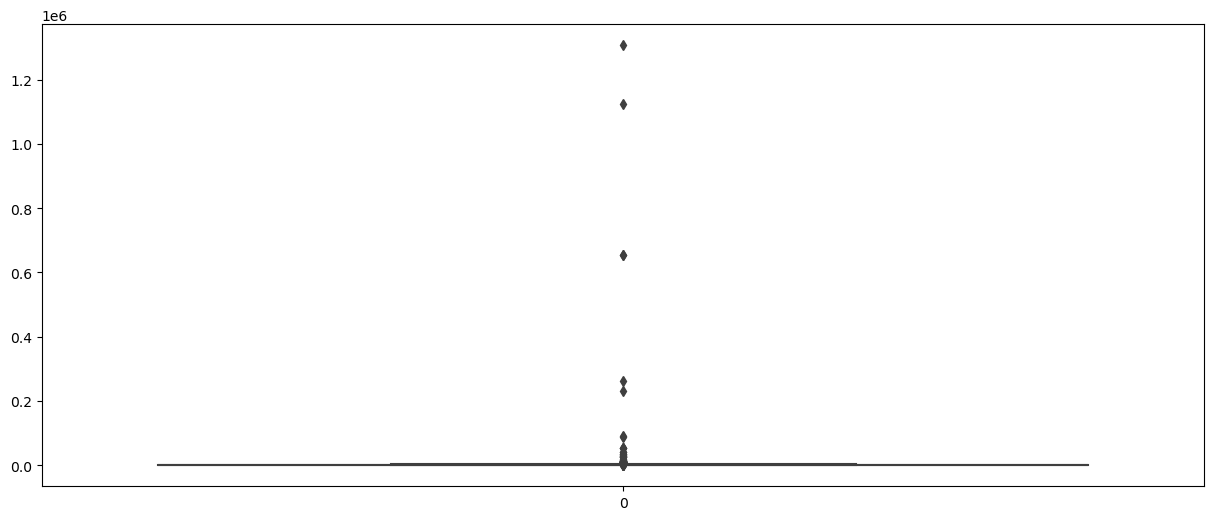

In [39]:

# Outlier Analysis for 'total square feet' column

plt.figure(figsize=(15,6))
sns.boxplot(data['total_sqft'])  # A lot of outliers present
plt.show()


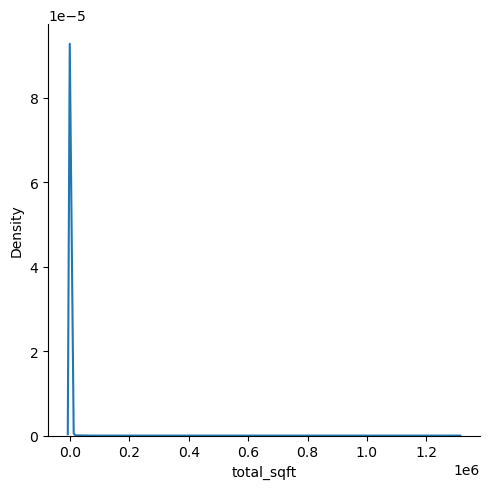

In [40]:

# Data is highly skewed
sns.displot(data['total_sqft'],kind='kde')
plt.show()  


In [41]:

# To remove right skewness
data['total_sqft'] = np.log(data['total_sqft'])


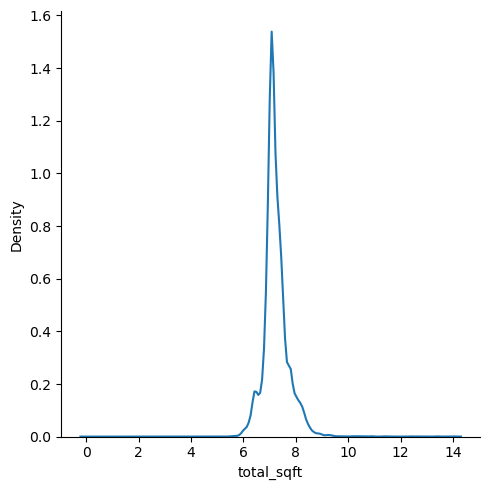

In [42]:

# After log transformation
sns.displot(data['total_sqft'],kind='kde')
plt.show()


In [43]:

def remove_total_sqft_outliers(data):
    
    data_out = pd.DataFrame()
    for i,j in data.groupby(by=['location','area_type']):
        
        m = np.mean(j['total_sqft'])
        sd = np.std(j['total_sqft'])
        final_data = j[((j['total_sqft']) > (m-sd)) & ((j['total_sqft']) <= (m+sd))]
        
        data_out = pd.concat([data_out, final_data], ignore_index=True)
    return data_out

data = remove_total_sqft_outliers(data)


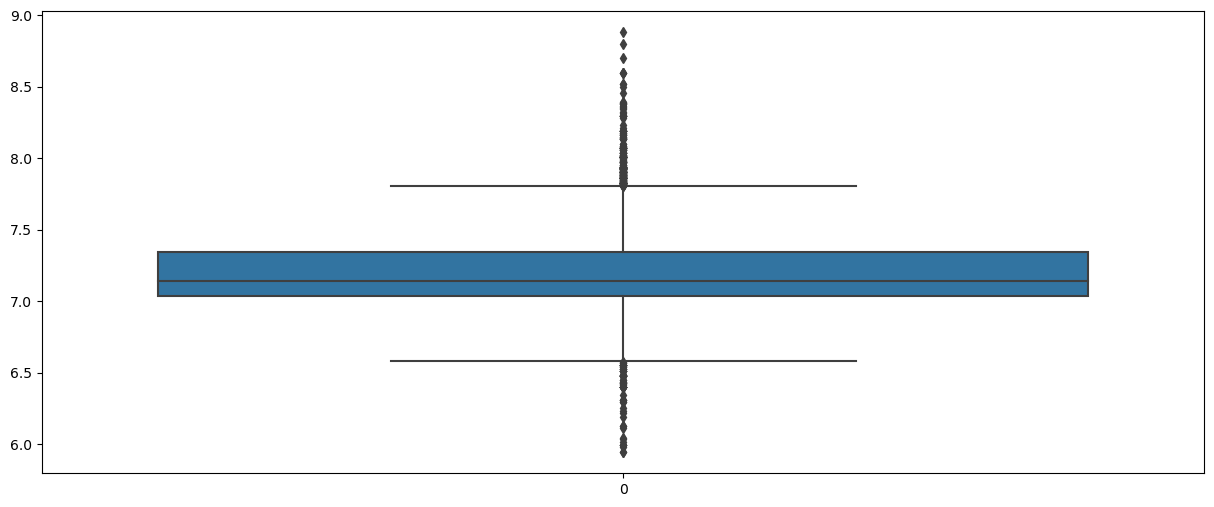

In [44]:

# After removing outliers

plt.figure(figsize=(15,6))
sns.boxplot(data['total_sqft'])
plt.show()


In [45]:

data.shape  # 9855 rows left


(9855, 5)

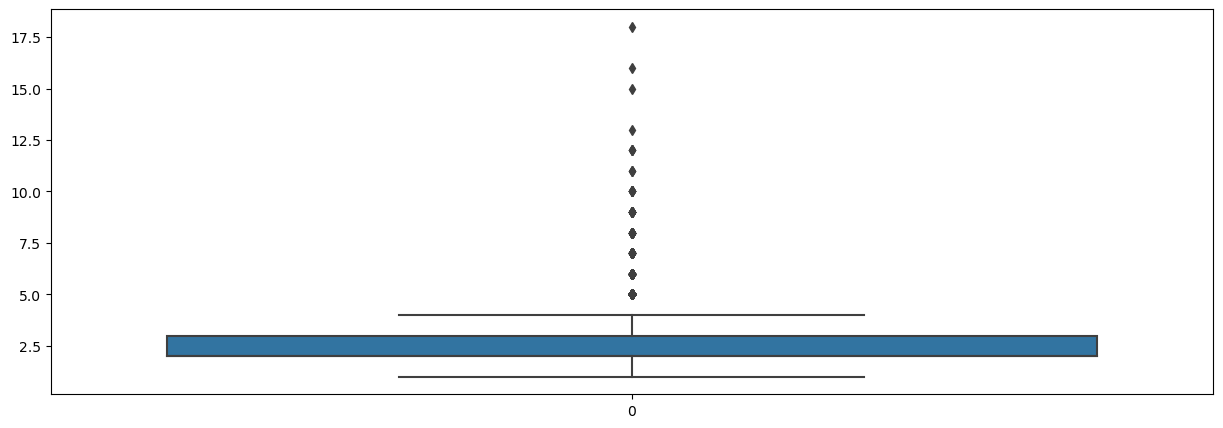

In [46]:

# Outlier Analysis for 'bath' column

plt.figure(figsize=(15,5))
sns.boxplot(data['bath'])
plt.show()


In [47]:

# To remove outliers

data = data[(data['bath'] < 10)]


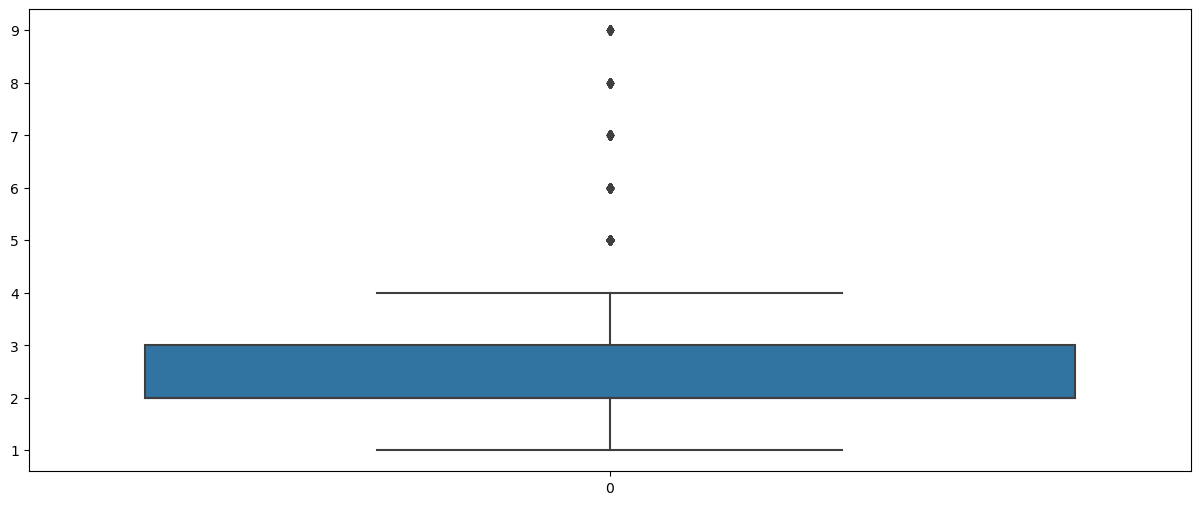

In [48]:

# After removing outliers

plt.figure(figsize=(15,6))
sns.boxplot(data['bath'])
plt.show()


In [49]:

data.shape   # 9835 rows left


(9835, 5)

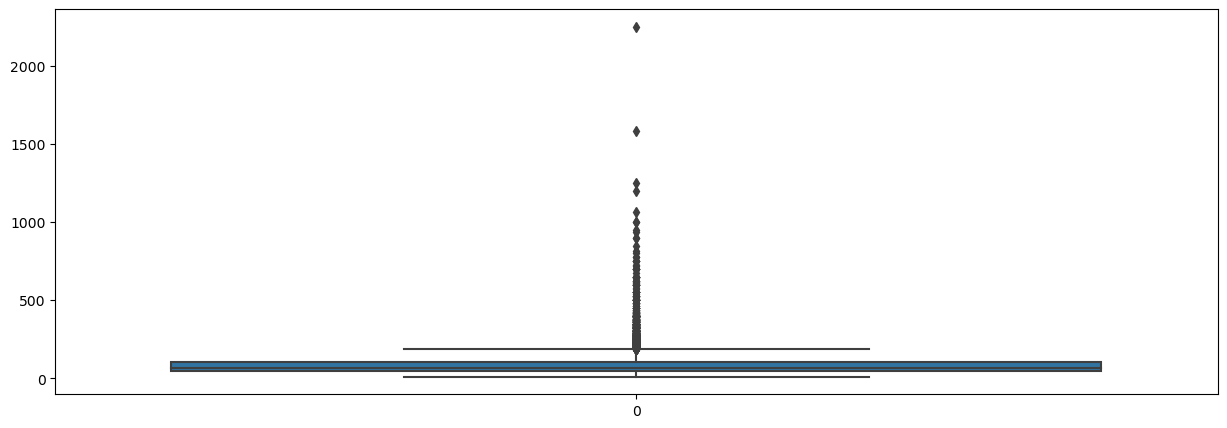

In [50]:

# Outlier Analysis for 'price' column

plt.figure(figsize=(15,5))   # Lots of outliers present 
sns.boxplot(data['price'])
plt.show()


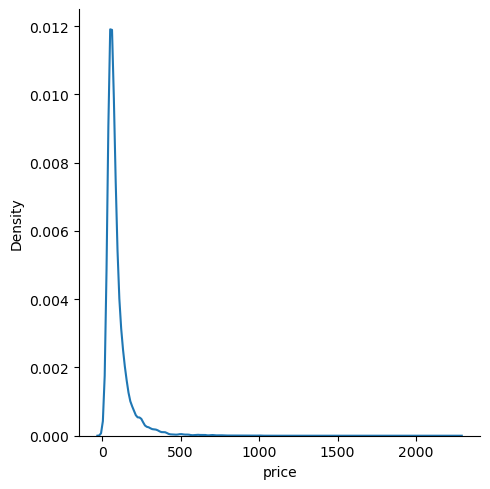

In [51]:

# Data is highly skewed
sns.displot(data['price'],kind='kde')
plt.show()


In [52]:

# To remove right skewness
data['price'] = np.log(data['price'])


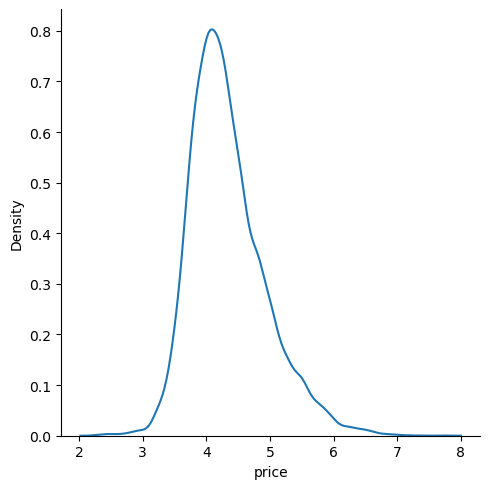

In [53]:

sns.displot(data['price'],kind='kde')
plt.show()


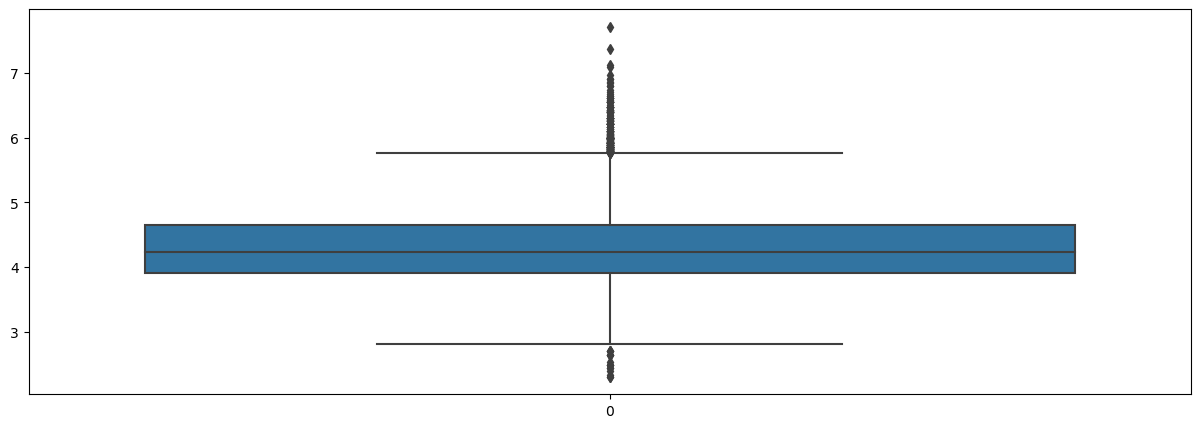

In [54]:

plt.figure(figsize=(15,5))   # Still lots of outliers present 
sns.boxplot(data['price'])
plt.show()


In [55]:

def remove_prices_outliers(data):
    
    data_out = pd.DataFrame()
    for i,j in data.groupby(by=['location','area_type']):
        
        m = np.mean(j['price'])
        sd = np.std(j['price'])
        final_data = j[((j['price']) > (m-sd)) & ((j['price']) <= (m+sd))]
        
        data_out = pd.concat([data_out, final_data], ignore_index=True)
    return data_out

data = remove_prices_outliers(data)


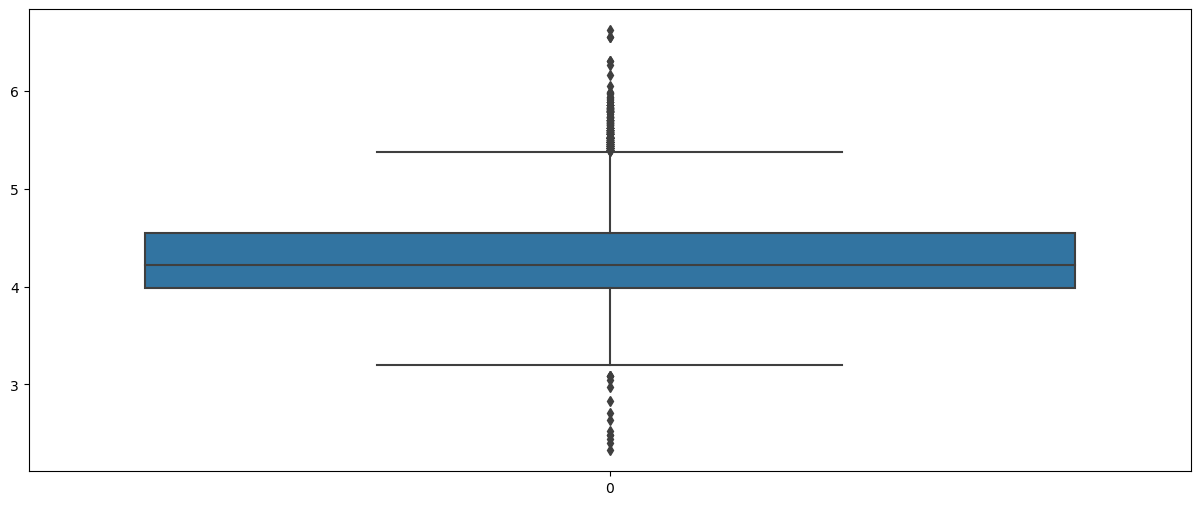

In [56]:

# After removing outliers

plt.figure(figsize=(15,6))
sns.boxplot(data['price'])
plt.show()


In [57]:

data.shape   # After removing outliers 6674 rows left out of 13,320


(6674, 5)

# BIVARIATE ANALYSIS

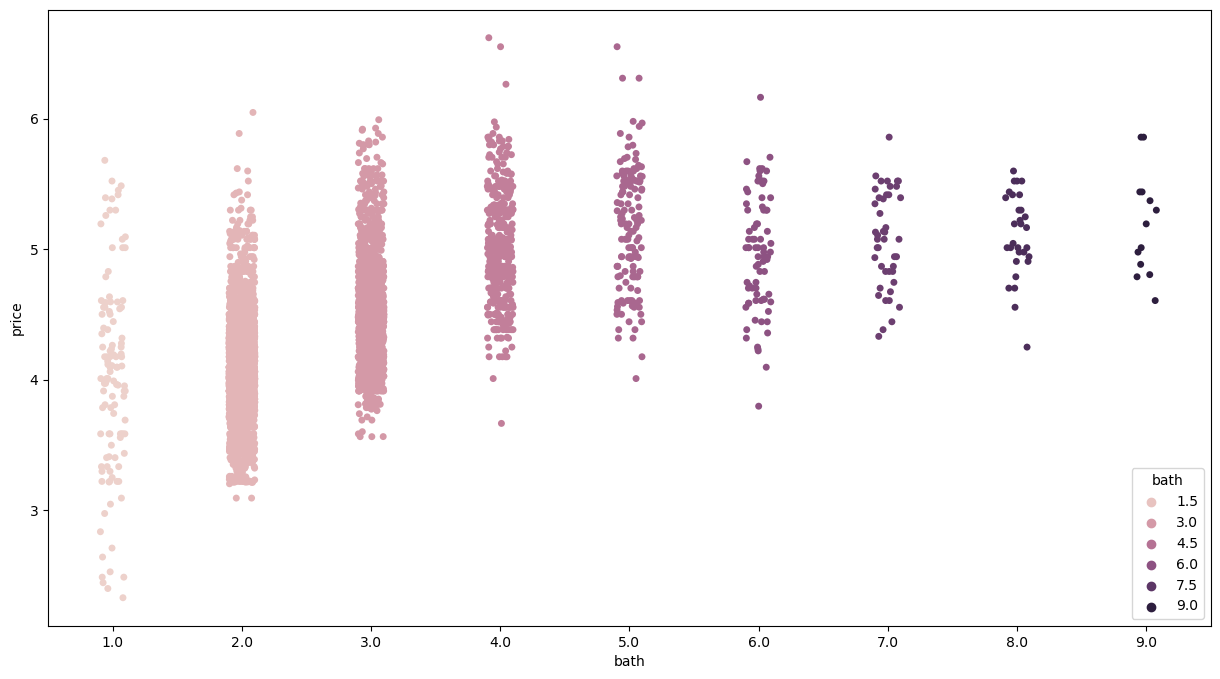

In [58]:

plt.figure(figsize=(15,8))
sns.stripplot(x=data['bath'],y=data['price'],hue=data['bath'])
plt.show()


### As the number of bathroom increases, price range goes up.

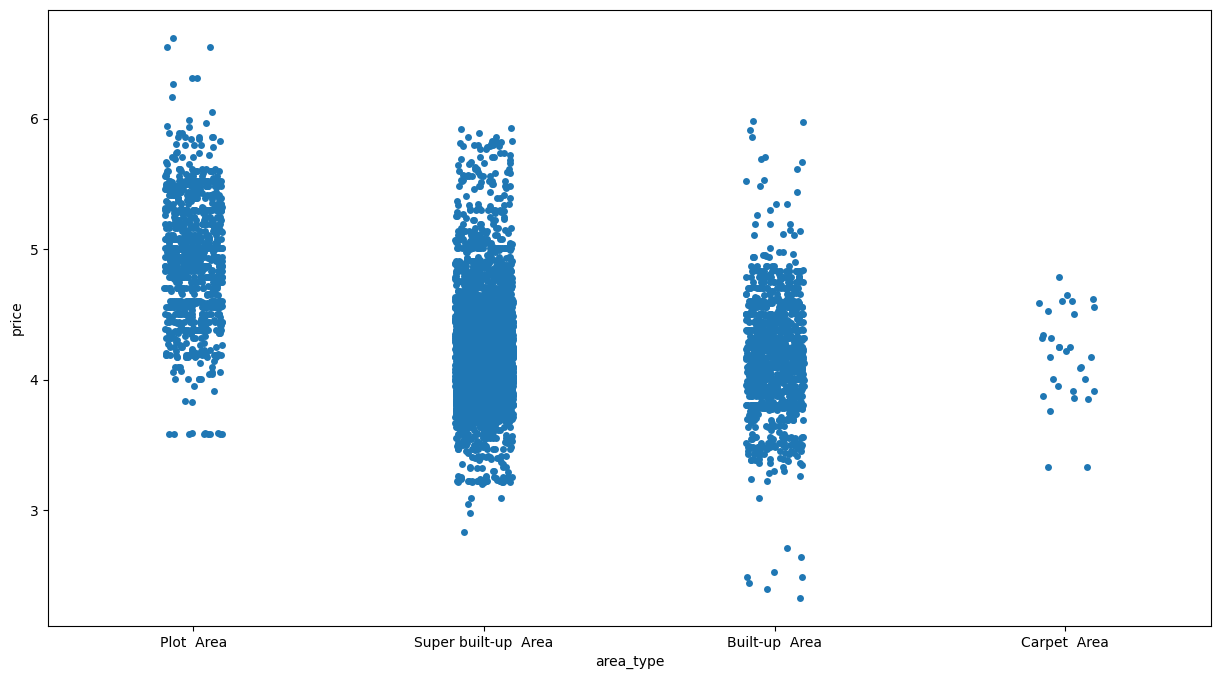

In [59]:

plt.figure(figsize=(15,8))
sns.stripplot(data=data,y='price',x='area_type')
plt.show()


### Price range is lower for built up areas and highest for plot areas.

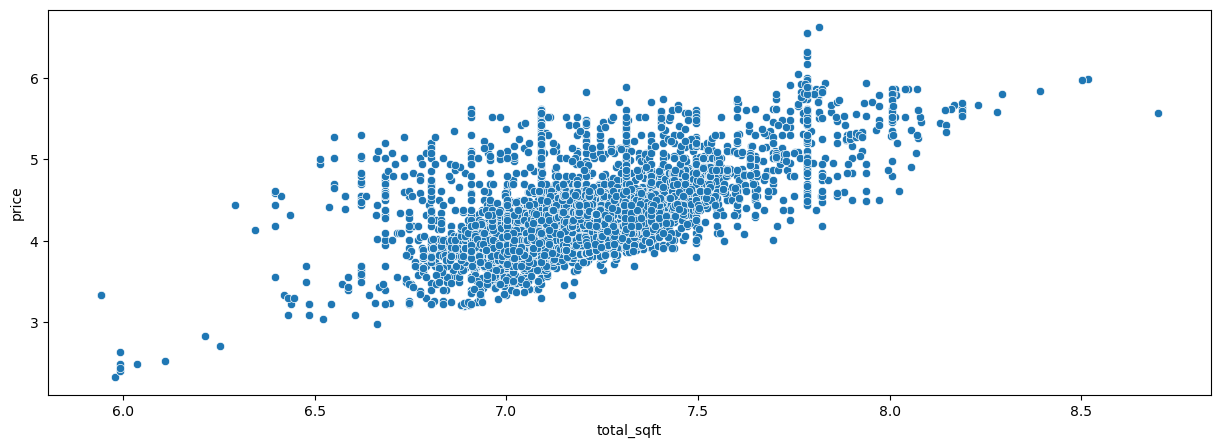

In [60]:

plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='price',x='total_sqft')
plt.show()


### With increase in total square feet area, price is also increasing.

# Clean Data

In [61]:

data


,area_type,location,total_sqft,bath,price
0,Plot Area,1st Phase JP Nagar,7.090077,7.0,5.480639
1,Super built-up Area,1st Phase JP Nagar,7.239933,2.0,4.605170
2,Super built-up Area,1st Phase JP Nagar,7.371489,3.0,4.875197
3,Super built-up Area,1st Phase JP Nagar,7.536364,3.0,5.117994
4,Super built-up Area,1st Phase JP Nagar,7.612831,3.0,5.056246
...,...,...,...,...,...
6669,Super built-up Area,Yeshwanthpur,7.434257,3.0,4.682131
6670,Super built-up Area,Yeshwanthpur,7.446001,3.0,4.700480
6671,Super built-up Area,Yeshwanthpur,7.522941,3.0,4.605170
6672,Super built-up Area,Yeshwanthpur,7.575585,4.0,4.867534


In [62]:

data.shape


(6674, 5)

In [63]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   6674 non-null   object 
 1   location    6674 non-null   object 
 2   total_sqft  6674 non-null   float64
 3   bath        6674 non-null   float64
 4   price       6674 non-null   float64
dtypes: float64(3), object(2)
memory usage: 260.8+ KB


In [64]:

data.describe(include='all')


,area_type,location,total_sqft,bath,price
count,6674,6674,6674.000000,6674.000000,6674.000000
unique,4,145,NaN,NaN,NaN
top,Super built-up Area,Others,NaN,NaN,NaN
freq,4527,2386,NaN,NaN,NaN
mean,NaN,NaN,7.186386,2.536410,4.303345
std,NaN,NaN,0.244725,1.016104,0.485201
min,NaN,NaN,5.942799,1.000000,2.327278
25%,NaN,NaN,7.047517,2.000000,3.984530
50%,NaN,NaN,7.138867,2.000000,4.219508
75%,NaN,NaN,7.313220,3.000000,4.543295


#  Predictive Modelling

In [65]:

x=data.drop(columns=['price'])


In [66]:

y=data['price']


In [67]:

# Independent Variables (Features)
x 


,area_type,location,total_sqft,bath
0,Plot Area,1st Phase JP Nagar,7.090077,7.0
1,Super built-up Area,1st Phase JP Nagar,7.239933,2.0
2,Super built-up Area,1st Phase JP Nagar,7.371489,3.0
3,Super built-up Area,1st Phase JP Nagar,7.536364,3.0
4,Super built-up Area,1st Phase JP Nagar,7.612831,3.0
...,...,...,...,...
6669,Super built-up Area,Yeshwanthpur,7.434257,3.0
6670,Super built-up Area,Yeshwanthpur,7.446001,3.0
6671,Super built-up Area,Yeshwanthpur,7.522941,3.0
6672,Super built-up Area,Yeshwanthpur,7.575585,4.0


In [68]:

# Dependent Variable (Target Column)
y


0       5.480639
1       4.605170
2       4.875197
3       5.117994
4       5.056246
          ...   
6669    4.682131
6670    4.700480
6671    4.605170
6672    4.867534
6673    4.562419
Name: price, Length: 6674, dtype: float64

# Linear Regression

In [69]:

from sklearn.model_selection import  train_test_split

from sklearn.compose import make_column_transformer

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [70]:

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=22)


In [71]:

print(x_train.shape)
print(x_test.shape)


(4671, 4)
(2003, 4)


In [72]:

# one hot encoding
col_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location','area_type']),
                                    remainder='passthrough')


In [73]:

scaled = StandardScaler()


In [75]:

lr=LinearRegression()


In [76]:

pipe = make_pipeline(col_trans,scaled,lr)


In [77]:

pipe.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location', 'area_type'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [78]:

y_predicted = pipe.predict(x_test)


In [79]:

# R2 value

r2_score (y_test,y_predicted)


0.8107375083521182

In [80]:

# Adjusted R-squared

1 - (1-pipe.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)


0.8079192243319951

# Evaluation Matrices for the Model

In [81]:

from sklearn.metrics import mean_squared_error as MSE

accuracy0 = pipe.score(x_test,y_test)
print("Testing Accuracy:",accuracy0)
print()

print("Training Accuracy:",pipe.score(x_train,y_train))
print()

MSE_score = MSE(y_test,y_predicted)
print("Mean Squared Error:",MSE_score.mean())
print()

import math
print("Root Mean Squared Error:",math.sqrt(MSE_score.mean())) 
print()

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_predicted))
print()


Testing Accuracy: 0.8107375083521182

Training Accuracy: 0.8068485339460552

Mean Squared Error: 0.0450932997998127

Root Mean Squared Error: 0.21235183022477744

Mean Absolute Error: 0.16276719721486302



In [82]:

col = ['Training Accuracy','Testing Accuracy' ,'MSE score','RMSE score','MAE score','R square','Adjusted R square']

model_log_report1 = pd.DataFrame( 
                    {
                    'Training Accuracy': [round(pipe.score(x_train, y_train),2)],
                    'Testing Accuracy' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'RMSE score' : [round(math.sqrt(MSE_score.mean()),2)],
                    'MAE score': [round(mean_absolute_error(y_test, y_predicted),2)],
                    'R square'   : [round(r2_score (y_test,y_predicted),2)],
                    'Adjusted R square' : [round(1 - (1-pipe.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1),2)]
                    },
                    columns=col,index=['Linear Regression'])


# Lasso Regression

In [83]:

from sklearn.linear_model import Lasso


In [85]:

lassoreg=Lasso(alpha=0.001)


pipe1 = make_pipeline(col_trans,scaled,lassoreg)
pipe1.fit(x_train,y_train)

y_predicted = pipe1.predict(x_test)
print("R2 value :",r2_score (y_test,y_predicted))
print()
print("Adjusted R2:",1 - (1-pipe1.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))
print()

accuracy1 = pipe1.score(x_test,y_test)
MSE_score1 = MSE(y_test,y_predicted)

print("Training Accuracy :",pipe1.score(x_train,y_train))
print()
print("Testing Accuracy :",accuracy1)
print()
print("Mean Squared Error :",MSE_score1.mean())
print()

print("Root Mean Squared Error :",math.sqrt(MSE_score1.mean())) 
print()

print("Mean Absolute Error :",mean_absolute_error(y_test, y_predicted))


R2 value : 0.8109455566274927

Adjusted R2: 0.8075089995952889

Training Accuracy : 0.8061688259163255

Testing Accuracy : 0.8109455566274927

Mean Squared Error : 0.0450437306370451

Root Mean Squared Error : 0.21223508342648043

Mean Absolute Error : 0.16327775341699605


In [86]:

model_log_report2 = pd.DataFrame( 
                    {
                    'Training Accuracy': [round(pipe1.score(x_train, y_train),2)],
                    'Testing Accuracy' : [round(pipe1.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'RMSE score' : [round(math.sqrt(MSE_score1.mean()),2)],
                    'MAE score': [round(mean_absolute_error(y_test, y_predicted),2)],
                    'R square'   : [round(r2_score (y_test,y_predicted),2)],
                    'Adjusted R square' : [round(1 - (1-pipe1.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1),2)]
                    },
                    columns=col,index=['Lasso Regression'])


# Ridge Regression

In [87]:

from sklearn.linear_model import Ridge

ridgereg=Ridge(alpha=0.001)

pipe2 = make_pipeline(col_trans,scaled,ridgereg)
pipe2.fit(x_train,y_train)
y_predicted = pipe2.predict(x_test)
print("R2 value :",r2_score (y_test,y_predicted))
print()
print("Adjusted R2 :",1 - (1-pipe2.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))
print()

accuracy1 = pipe2.score(x_test,y_test)
MSE_score1 = MSE(y_test,y_predicted)

print("Training Accuracy :",pipe2.score(x_train,y_train))
print()
print("Testing Accuracy :",accuracy1)
print()
print("Mean Squared Error :",MSE_score1.mean())
print()

print("Root Mean Squared Error :",math.sqrt(MSE_score1.mean()))
print()


print("Mean Absolute Error :",mean_absolute_error(y_test, y_predicted))


R2 value : 0.810775467577678

Adjusted R2 : 0.8079337537758151

Training Accuracy : 0.8068527883067854

Testing Accuracy : 0.810775467577678

Mean Squared Error : 0.04508425571123796

Root Mean Squared Error : 0.21233053410010996

Mean Absolute Error : 0.16277128797511234


In [88]:

model_log_report3 = pd.DataFrame( 
                    {
                    'Training Accuracy': [round(pipe2.score(x_train, y_train),2)],
                    'Testing Accuracy' : [round(pipe2.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'RMSE score' : [round(math.sqrt(MSE_score1.mean()),2)],
                    'MAE score': [round(mean_absolute_error(y_test, y_predicted),2)],
                    'R square'   : [round(r2_score (y_test,y_predicted),2)],
                    'Adjusted R square' : [round(1 - (1-pipe2.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1),2)]
                    },
                    columns=col,index=['Ridge Regression'])


# Comparison of models

In [91]:

model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3))


In [92]:

model_comp


,Training Accuracy,Testing Accuracy,MSE score,RMSE score,MAE score,R square,Adjusted R square
Linear Regression,0.81,0.81,0.05,0.21,0.16,0.81,0.81
Lasso Regression,0.81,0.81,0.05,0.21,0.16,0.81,0.81
Ridge Regression,0.81,0.81,0.05,0.21,0.16,0.81,0.81
